In [22]:
import pandas as pd
import re

# Replace with the path to your parquet file
parquet_file_path = "output_file_2024-10-17.parquet"

# Load the Parquet file into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Display the DataFrame
print(len(df))
df.head(2)


1105


,id,title,code_postal,latitude,longitude,description,date_creation,date_actualization,contract_type,contract_nature,experience_bool,experience,salary,company_field
0,182XGPY,Sénior Ingénieur Data / BI (H/F),13080,43.541369,5.406124,Le Client : Votre futur employeur\nNotre clien...,2024-10-17T18:36:42.466Z,2024-10-17T18:36:42.989Z,CDI,Contrat travail,E,5 An(s),Annuel de 60000.0 Euros à 70000.0 Euros sur 13...,Conseil en systèmes et logiciels informatiques
1,182XGPD,Sénior Ingénieur Data / BI (H/F),83000,43.136385,5.933457,Le Client : Votre futur employeur\nNotre clien...,2024-10-17T18:31:21.191Z,2024-10-17T18:31:21.624Z,CDI,Contrat travail,E,5 An(s),Annuel de 60000.0 Euros à 70000.0 Euros sur 13...,Conseil en systèmes et logiciels informatiques


In [23]:
# Function to classify job titles
def classify_job_title(title):
    title = title.lower()  # Convert to lowercase for consistent matching
    if re.search(r'business analyst', title):
        return 'Business Analyst'
    #elif re.search(r'migration|intégration', title):
    #    return 'Data Migration'
    elif re.search(r'owner|product|product owner', title):
        return 'Data Product Owner'
    elif re.search(r'chef de projet', title):
        return 'Data Project Manager'
    elif re.search(r'consultant bi|bi', title):
        return 'Consultant BI'
    elif re.search(r'consultant data|consultant', title):
        return 'Consultant Data'
    #elif re.search(r'chief data officer', title):
    #    return 'Chief Data Officer'
    elif re.search(r'back|développeur|infra|software', title):
        return 'Software - Développeur Data'
    elif re.search(r'tech', title):
        return 'Technicien Data'
    elif re.search(r'assistant', title):
        return 'Data Assistant'
    elif re.search(r'data analyst|analyste|analytics', title):
        return 'Data Analyst'
    elif re.search(r'data architect|architect', title):
        return 'Data Architect'
    elif re.search(r'data engineer|ingénieur|engineer|ingenieur', title):
        return 'Data Engineer'
    elif re.search(r'data scientist|scientifique|science', title):
        return 'Data Scientist'
    elif re.search(r'data manager|gestionnaire|manager|administrator|manager|gestion', title):
        return 'Data Manager'
    elif re.search(r'data', title):
        return 'Other Data Position'
    else:
        return 'Other'
    
# Function to classify job titles
def classify_job_title_chef(title):
    title = title.lower()  # Convert to lowercase for consistent matching
    if re.search(r'chef', title):
        return 'Chef'
    else:
        return 'Other'
    

    
df['job_category'] = df['title'].apply(classify_job_title)
df['chef'] = df['title'].apply(classify_job_title_chef)
df = df[df['job_category'] != 'Other']
df['job_category'].value_counts()

job_category
Data Analyst                   186
Data Engineer                  179
Data Manager                    92
Other Data Position             88
Consultant BI                   87
Data Architect                  72
Technicien Data                 54
Data Project Manager            44
Data Scientist                  37
Consultant Data                 34
Business Analyst                29
Software - Développeur Data     18
Data Product Owner              15
Data Assistant                   7
Name: count, dtype: int64

In [24]:
others = df[df['job_category'] == 'Other Data Position']

others['title'].unique()

array(['Responsable DATA et Reporting Assistance - F/H (H/F)',
       'Responsable Data Paie (H/F)',
       'Chargé(e) de Data Marketing H/F (H/F)',
       "Responsable d'applications Data Écosystème Connaissance Client F/ (H/F)",
       'Data Quality Specialist (H/F)',
       'Chargé(e) de mission Environnement & Data management (CSRD) H/F',
       'Délégué / Déléguée à la protection des données - Data Protection Officer (H/F)',
       'Data steward confirmé (H/F)',
       'Junior Data Integration Specialist (H/F)',
       'Expert(e) data SNDS (Système National des Données de Santé) (H/F)',
       'Responsable du pôle data et innovation (H/F)',
       'Expert - Dataiku, GCP, MLOps, Terraform & Ansible (H/F)',
       'Lead Datascientist et IA (H/F)',
       'ADJOINT RESPONSABLE MASTERDATA H/F',
       "Chargé d'études DATA H/F (Nouvelle-Calédonie) H/F",
       'Responsable digital et data rh f/h (H/F)',
       'Apprenti(e) - data privacy / protection office af- klm f/h (H/F)',
       '

In [25]:
keywords = [
    'sql', 'python', 'pyspark', 'azure', 'aws', 'gcp', 'etl', 'airflow', 'kafka', 'spark', 
    'power bi', 'tableau', 'snowflake', 'docker', 'kubernetes', 'git', 'data warehouse', 
    'hadoop', 'mlops', 'data lake', 'bigquery', 'databricks', 'dbt', 'mlflow',
    'java', 'scala', 'sas', 'matlab', 'power query', 'looker', 'apache', 'hive', 
    'terraform', 'jenkins', 'gitlab', 'machine learning', 'deep learning', 'nlp', 
    'api', 'pipeline', 'data governance','erp', 'ssis', 'ssas', 'ssrs', 'ssms', 'postgre', 'mysql', 'mongodb', 'cloud',
    
    
    # Azure components
    'synapse', 'blobstorage', 
    'azure devops',
    'fabric',

    # AWS components
    'glue', 'redshift', 's3', 'lambda', 'emr', 'athena',
    'kinesis', 'rds', 'sagemaker',

]

# Function to check for keyword presence in the description
def check_keyword_presence(description, keyword):
    # Search for the keyword in the description (case-insensitive)
    return 'Y' if re.search(rf'\b{keyword.lower()}\b', description.lower()) else 'N'

# Apply the function for each keyword and create a new column
for keyword in keywords:
    df[keyword] = df['description'].apply(lambda x: check_keyword_presence(x, keyword))
    
df

,id,title,code_postal,latitude,longitude,description,date_creation,date_actualization,contract_type,contract_nature,...,fabric,glue,redshift,s3,lambda,emr,athena,kinesis,rds,sagemaker
0,182XGPY,Sénior Ingénieur Data / BI (H/F),13080,43.541369,5.406124,Le Client : Votre futur employeur\nNotre clien...,2024-10-17T18:36:42.466Z,2024-10-17T18:36:42.989Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
1,182XGPD,Sénior Ingénieur Data / BI (H/F),83000,43.136385,5.933457,Le Client : Votre futur employeur\nNotre clien...,2024-10-17T18:31:21.191Z,2024-10-17T18:31:21.624Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
2,182WXDL,Lead Data Engineer/Ops (H/F),44800,47.227082,-1.625284,Description de l'entreprise\nEditeur de logici...,2024-10-17T15:12:38.593Z,2024-10-17T15:12:39.198Z,CDI,Contrat travail,...,N,N,N,Y,N,N,N,N,Y,N
3,182WNHJ,Offre de CDI de Data Engineer MLOps en audio (...,97490,-20.909778,55.444588,Les récifs coralliens abritent 30 % de la biod...,2024-10-17T11:28:04.260Z,2024-10-17T11:28:04.854Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
4,182VYYP,Data engineer (H/F),06410,43.628198,7.084843,"\nDepuis près de 6 ans, Inov Team se distingue...",2024-10-16T17:23:35.279Z,2024-10-17T07:29:18.460Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,9278032,INGÉNIEUR BE (H/F),26800,44.833660,4.885224,"Notre client, basé en Drôme (26), est un Group...",2024-06-20T12:49:16.000Z,2024-09-19T06:32:18.000Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
1101,8457535,Architecte réseau (h/f),94150,48.750000,2.350000,QUI SOMMES-NOUS ?L'activité Systèmes terrestre...,2024-06-07T08:04:10.000Z,2024-10-14T05:42:50.000Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
1102,6255439,Consultant architecte cybersécurité (h/f),None,NaN,NaN,QUI SOMMES-NOUS ?Les entreprises et les gouver...,2024-04-30T22:05:35.000Z,2024-10-09T07:48:52.000Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N
1103,0465210,Architecte produits inertiels (f/h) (H/F),86100,46.800000,0.533333,QUI SOMMES-NOUS ?L'activité avionique fournit ...,2024-01-28T06:28:33.000Z,2024-10-10T18:43:32.000Z,CDI,Contrat travail,...,N,N,N,N,N,N,N,N,N,N


In [26]:
# Assuming df_percentages is already defined
# Count the occurrences of 'Y' for each keyword and calculate the percentage
total_jobs = len(df)

keyword_counts = df[keywords].apply(lambda col: (col == 'Y').sum())
keyword_percentages = (keyword_counts / total_jobs) * 100

df_percentages = pd.DataFrame({
    'Tool/Technology': keyword_percentages.index,
    'Percentage': keyword_percentages.values
})
df_percentages = df_percentages.sort_values(by='Percentage', ascending=False)

job_counts = df['job_category'].value_counts()


C:\Users\eneko\AppData\Local\Temp\ipykernel_16284\2342675024.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_20, x='Percentage', y='Tool/Technology', palette=colors)
C:\Users\eneko\AppData\Local\Temp\ipykernel_16284\2342675024.py:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bar_plot = sns.barplot(data=top_20, x='Percentage', y='Tool/Technology', palette=colors)
C:\Users\eneko\AppData\Local\Temp\ipykernel_16284\2342675024.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_yticklabels(bar_plot.get_yticklabels(), fontsize=50)  # Adjust the size here


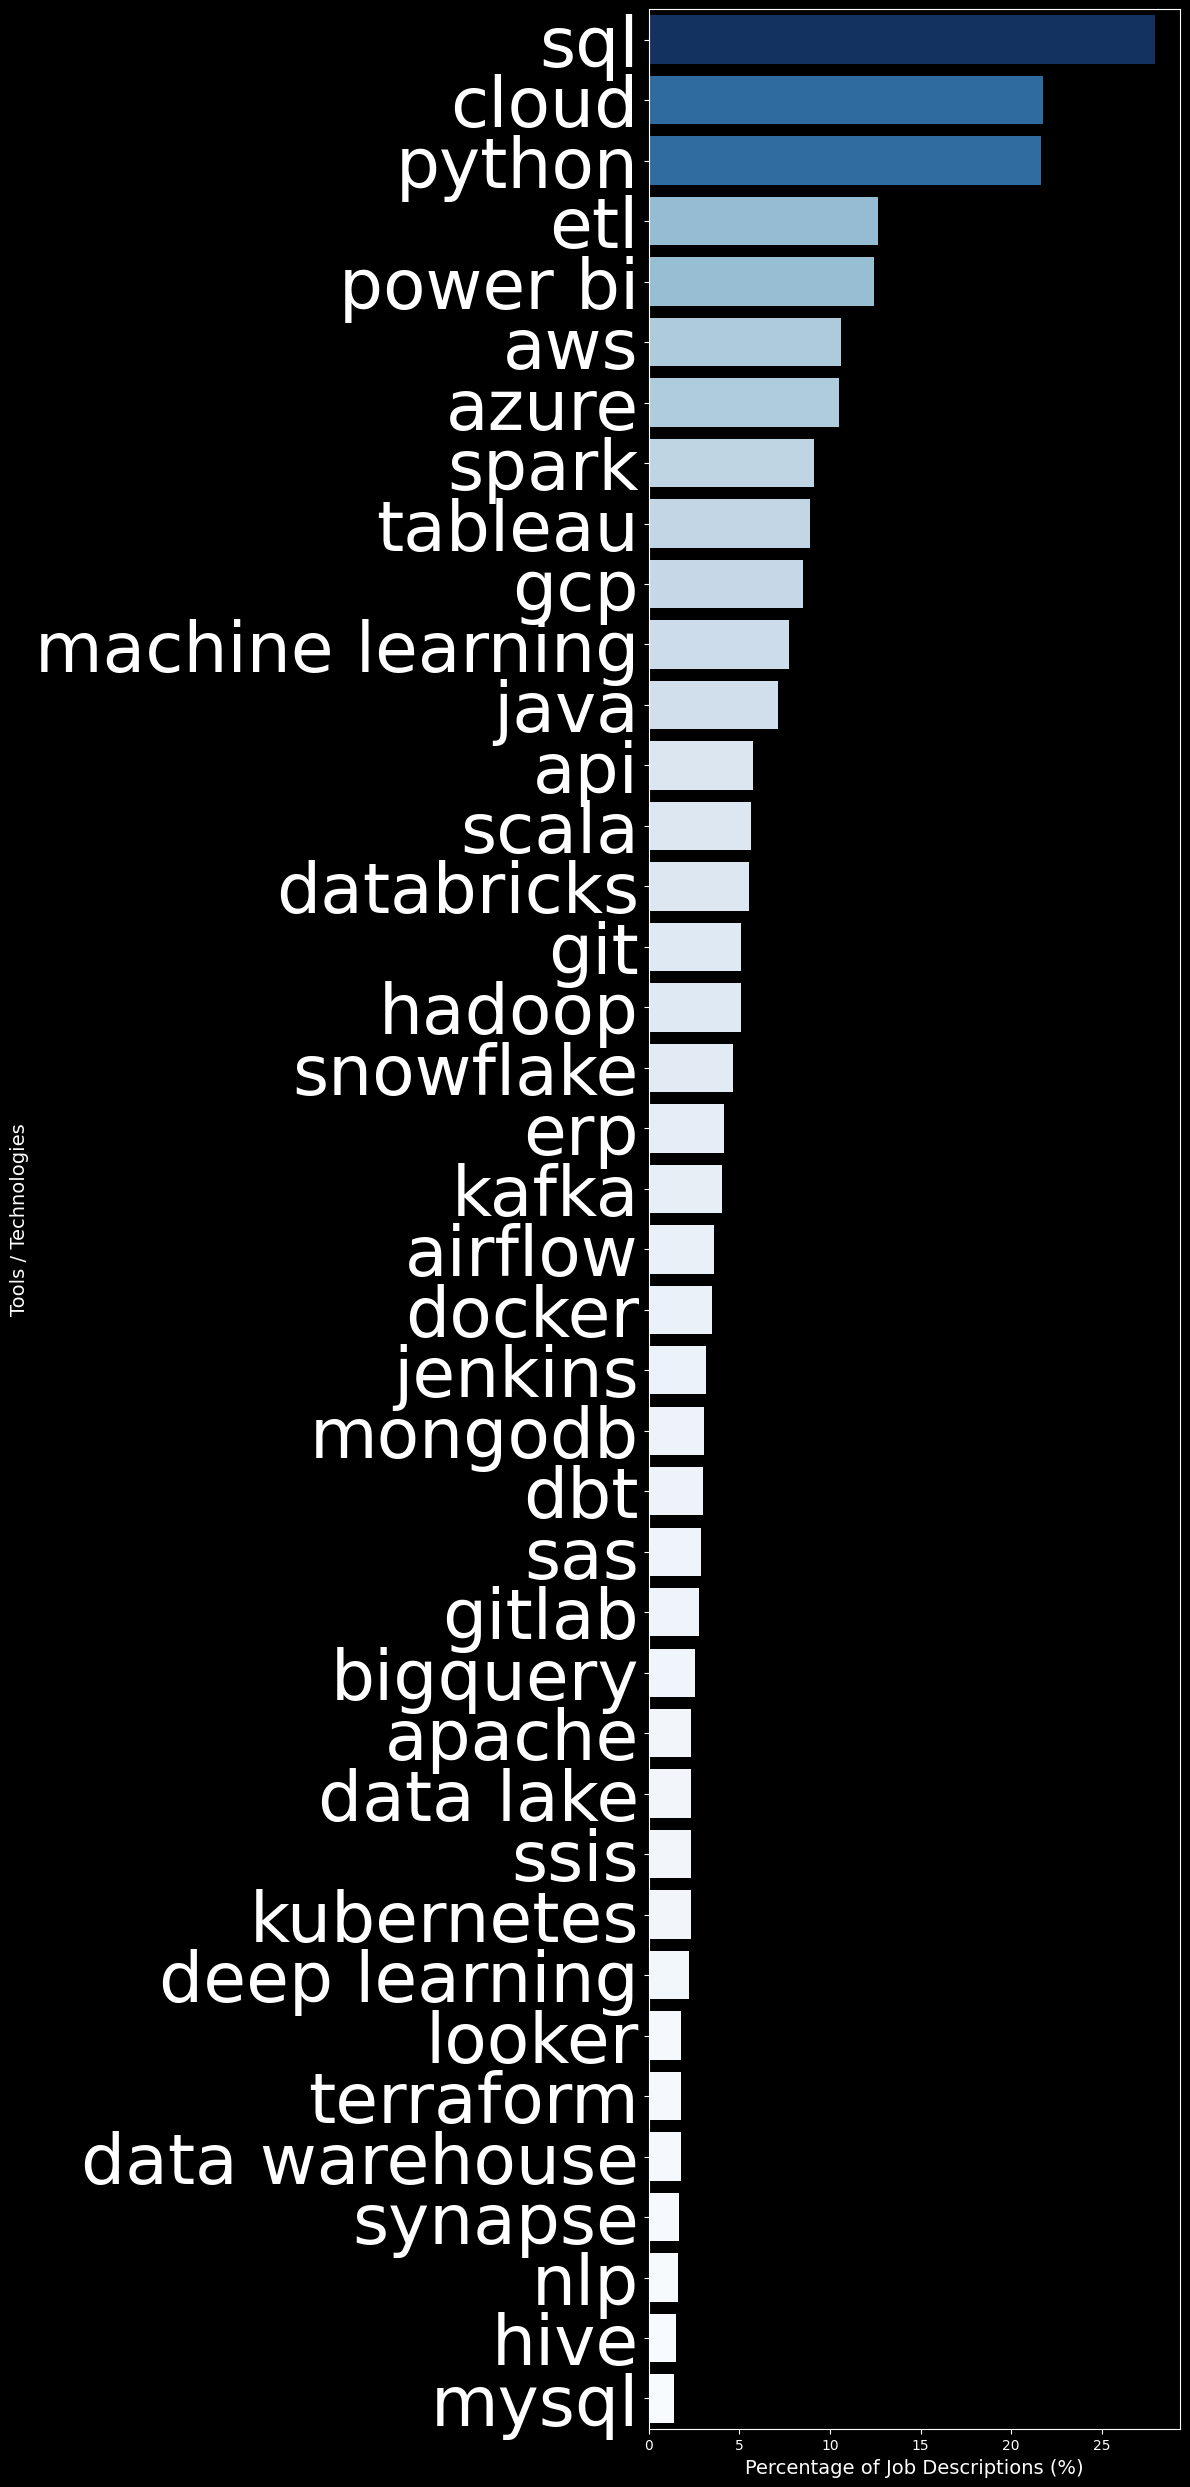

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_percentages is already defined and sorted by 'Percentage'
# Example: df_percentages = pd.DataFrame({'Tool/Technology': ['Tool1', 'Tool2'], 'Percentage': [80, 40]})

# Filter for the top 20 tools/technologies
top_20 = df_percentages.head(40)

# Create a colormap that darkens with higher values
norm = plt.Normalize(top_20['Percentage'].min(), top_20['Percentage'].max())
colors = plt.cm.Blues(norm(top_20['Percentage']))

# Create the figure
plt.figure(figsize=(12, 25))
bar_plot = sns.barplot(data=top_20, x='Percentage', y='Tool/Technology', palette=colors)

# Increase the font size of the y-axis labels (tools/technologies)
bar_plot.set_yticklabels(bar_plot.get_yticklabels(), fontsize=50)  # Adjust the size here

# Add labels and title
#plt.title('TOP DEMANDEDED SKILLS ON JOB DESCRIPTIONS', fontsize=20, fontweight='bold')
plt.xlabel('Percentage of Job Descriptions (%)', fontsize=14)
plt.ylabel('Tools / Technologies', fontsize=14)

# Save the plot as a PNG with a transparent background
plt.tight_layout()
plt.savefig("top_20_skills.png", transparent=True)

# Show the plot
plt.show()


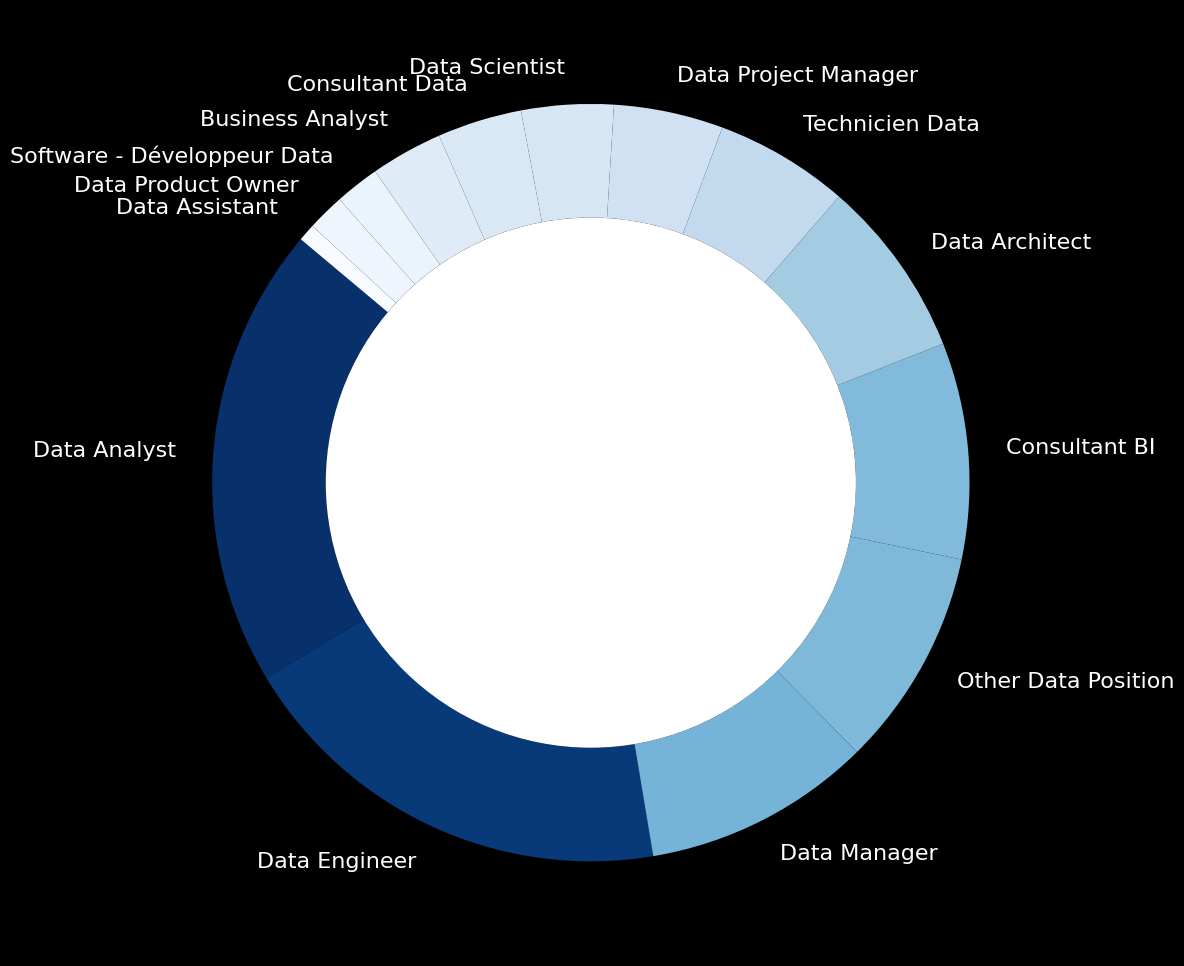

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Count the occurrences of each job category
job_counts = df['job_category'].value_counts()

# Create a colormap that darkens with higher values
norm = plt.Normalize(job_counts.min(), job_counts.max())
colors = plt.cm.Blues(norm(job_counts))

# Create the donut chart
plt.figure(figsize=(12, 15))
plt.pie(job_counts, labels=job_counts.index, startangle=140, colors=colors, 
        wedgeprops=dict(width=0.3), textprops={'fontsize': 16})  # Increase fontsize here

# Draw a circle at the center of the pie chart to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
#plt.title('Distribution of Job Categories', fontsize=20, fontweight='bold')

# Save the plot as a PNG with a transparent background
plt.savefig("job_category_distribution.png", transparent=True)

# Show the plot
plt.show()
